In [24]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [5]:
df= pd.read_csv('data2017.csv',encoding='big5')

In [6]:
df

,no,a2,a3,a4,a5,a6,a7,v1_1,v1_2,v1_3,...,v14_5,v14_6,v14_o,v15_1,v15_2,v15_3,v15_4,v15_5,v15_6,v15_o
0,810,1,2,2,8,1,3,1,3,5,...,,,,1,2,5,,,,
1,12,1,3,3,11,3,1,1,3,4,...,,,,1,2,3,4,,,
2,173,1,2,3,11,3,1,3,,,...,,,,1,2,4,,,,
3,177,1,3,4,11,3,1,3,4,,...,,,,1,2,3,4,5,,
4,179,1,2,3,11,3,1,3,4,5,...,,,,1,2,4,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,532,2,2,1,5,3,2,1,2,3,...,,,,7,,,,,,沒有以上的問題。
1081,453,2,2,1,2,3,3,1,2,3,...,,,,2,6,,,,,
1082,142,1,2,3,18,1,4,2,,,...,,,,1,2,3,,,,
1083,604,2,2,3,18,2,1,1,,,...,,,,1,5,,,,,


In [8]:
df.describe()

,no,a2,a3,a4,a5,a6,a7,v1_1,v2,v5_1,v6_1,v7,v10_1,v11,v12_1,v13_1,v14_1,v15_1
count,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000,1085.000000
mean,554.921659,1.562212,2.332719,2.757604,9.490323,2.165899,1.999078,2.490323,1.337327,2.338249,3.647926,3.138249,2.551152,6.115207,3.000000,1.595392,1.972350,1.875576
std,318.275369,0.496343,0.586509,0.766726,5.160804,0.799064,0.908650,1.997496,0.473016,1.956837,2.591055,0.896520,1.636307,1.428686,2.283827,1.288387,1.811497,1.647486
min,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,279.000000,1.000000,2.000000,3.000000,5.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,5.000000,1.000000,1.000000,1.000000,1.000000
50%,558.000000,2.000000,2.000000,3.000000,9.000000,2.000000,2.000000,2.000000,1.000000,1.000000,3.000000,3.000000,2.000000,6.000000,2.000000,1.000000,1.000000,1.000000
75%,831.000000,2.000000,3.000000,3.000000,14.000000,3.000000,3.000000,3.000000,2.000000,3.000000,7.000000,4.000000,3.000000,7.000000,3.000000,2.000000,2.000000,2.000000
max,1103.000000,2.000000,3.000000,4.000000,18.000000,3.000000,4.000000,10.000000,2.000000,10.000000,14.000000,5.000000,8.000000,10.000000,9.000000,8.000000,10.000000,8.000000


In [11]:
x_data=df[['a2','a3','a4','a5','a6','a7']]
y_data=df[['v7']]
print(x_data)
print(y_data)

      a2  a3  a4  a5  a6  a7
0      1   2   2   8   1   3
1      1   3   3  11   3   1
2      1   2   3  11   3   1
3      1   3   4  11   3   1
4      1   2   3  11   3   1
...   ..  ..  ..  ..  ..  ..
1080   2   2   1   5   3   2
1081   2   2   1   2   3   3
1082   1   2   3  18   1   4
1083   2   2   3  18   2   1
1084   2   2   3  14   3   3

[1085 rows x 6 columns]
      v7
0      1
1      4
2      4
3      3
4      4
...   ..
1080   5
1081   1
1082   3
1083   2
1084   3

[1085 rows x 1 columns]


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split (x_data,y_data)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(813, 6)
(272, 6)
(813, 1)
(272, 1)


In [33]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

def classification(model):
    print(model)
    model.fit(x_train,y_train)
    print(model.score(x_train,y_train))
    y_pred=model.predict(x_test)
    # print(accuracy_score(y_test,y_pred))
    print(r2_score(y_test,y_pred))
    print(mean_squared_error(y_test,y_pred))
    print(explained_variance_score(y_test,y_pred))
    return model

In [34]:
from sklearn.linear_model import LinearRegression
model = classification(LinearRegression())

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
0.022778175810291734
0.015722006132645516
0.7313968829862089
0.016126066108352766


In [36]:
from sklearn.linear_model import LogisticRegression
model=classification(LogisticRegression())

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)
0.4784747847478475
-0.029103608847497187
0.7647058823529411
0.0


In [37]:
from sklearn import tree
model = classification(tree.DecisionTreeClassifier())

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
0.7146371463714637
-0.9592549476135044
1.4558823529411764
-0.9301513387660074


In [39]:
from sklearn.ensemble import RandomForestClassifier
model = classification(RandomForestClassifier())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators='warn',
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
0.6986469864698647
-0.5436554132712459
1.1470588235294117
-0.5410360884749712


In [45]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

clf = ExtraTreesClassifier(n_estimators=50)
clf=clf.fit(x_train,y_train)
x_list=[x for x in range(6)]
y_list=clf.feature_importances_
print(y_list)

[0.04941913 0.07250427 0.09468458 0.50616785 0.11304691 0.16417726]


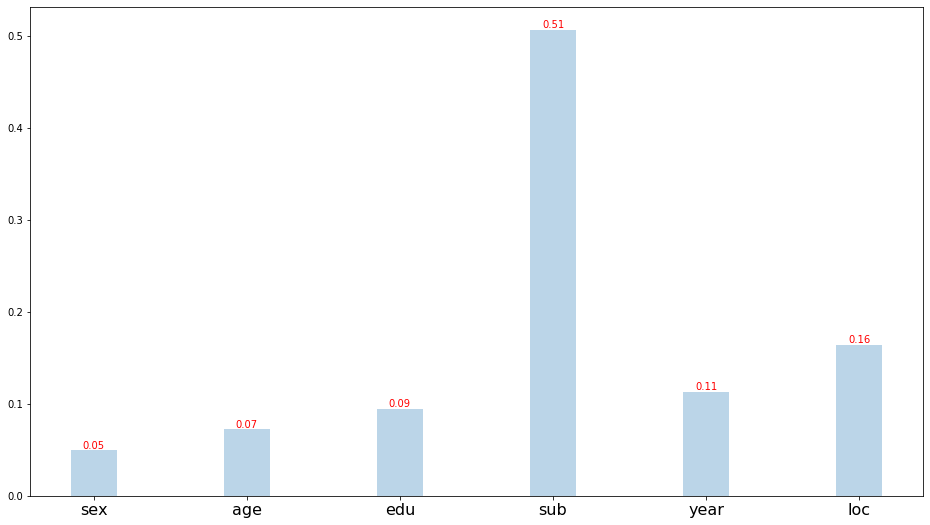

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,9))
plt.bar([0,1,2,3,4,5],clf.feature_importances_,alpha=0.3,width=0.3)
plt.xticks(np.arange(len(y_list)),['sex', 'age', 'edu', 'sub', 'year', 'loc'],fontsize=16)

for xy in zip(x_list,y_list):
    plt.annotate('%.2f'% xy[1],xy=xy,verticalalignment='bottom',horizontalalignment='center',color='red',fontsize=10)
    
plt.show()

In [61]:
major_df=df[['a5','v7']]
major_df=major_df.groupby(['a5']).mean()
major_series=major_df.T.squeeze()
major_series.sort_values(ascending=False)

a5
1     3.666667
4     3.400000
17    3.357143
3     3.316667
14    3.270270
2     3.194030
12    3.187500
5     3.168224
8     3.125000
11    3.120219
13    3.090909
16    3.062500
7     3.050000
9     3.040816
18    3.016393
15    3.000000
6     2.857143
10    2.714286
Name: v7, dtype: float64

In [63]:
import matplotlib
matplotlib.matplotlib_fname()

'C:\\Users\\Toro\\Anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

NameError: name 'yticks_list' is not defined

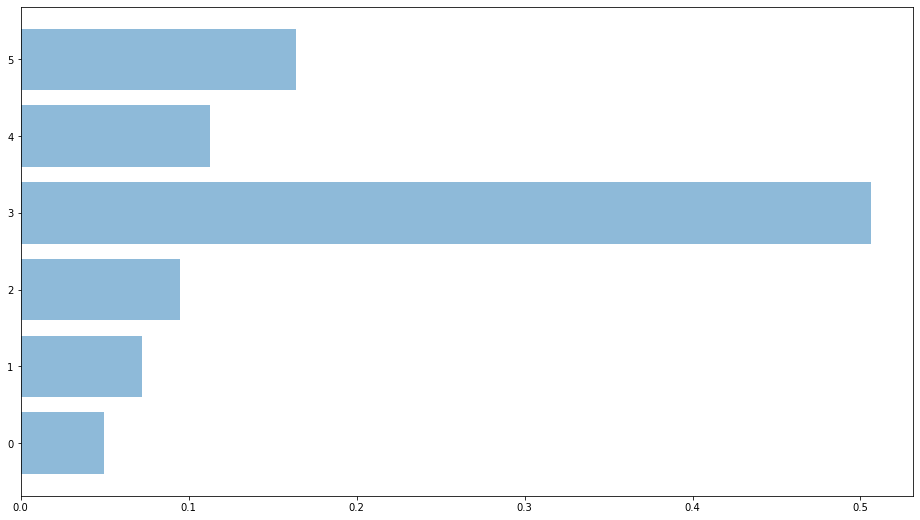

In [64]:
x_list = [x for x in range(18)]
y_list = major_series.sort_values(ascending=False).tolist()
yticks_list = ['edu',
               'psy',
               'com',
               'hum',
               'hou',
               'art',
               'arc',
               'man',
               'mat',
               'eng',
               'far',
               'tou',
               'sci',
               'med',
               'oth',
               'tra',
               'law',
               '工業技藝學類',]